In [162]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pickle
from matplotlib.ticker import MultipleLocator

In [89]:
fname = "saved_data/test1.pickle"

In [90]:
with open(fname, 'rb') as handle:
    df = pickle.load(handle)

In [103]:
df.head()

,price,episode,inv,action,ts,profit
0,0.88773,0.0,44.0,-44.0,0.0,0.00000
1,0.88788,0.0,117.0,-73.0,1.0,0.00000
2,0.88765,0.0,154.0,-37.0,2.0,0.00000
3,0.88799,0.0,57.0,97.0,3.0,0.01727
4,0.88763,0.0,36.0,21.0,4.0,0.00000


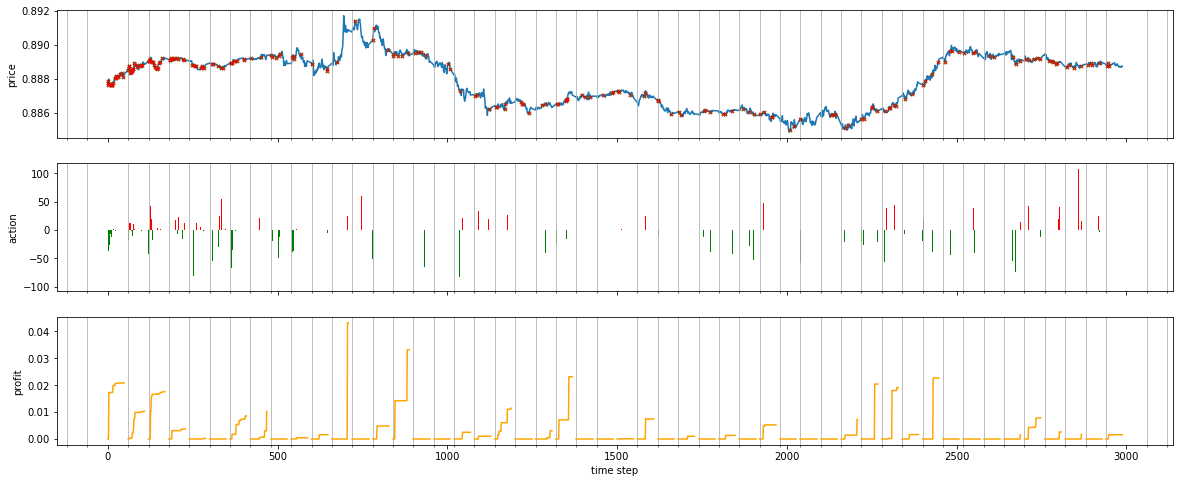

In [168]:
def price_graph(ax, df):
    size = 10
    a = 0.6

    ax.plot(df.ts, df.price, zorder=1)
    
    buy_data = df[df.action<0]
    ax.scatter(buy_data.ts, buy_data.price, color='g', s=size, alpha=a, zorder=2, marker='x')
    
    sell_data = df[df.action>0]
    ax.scatter(buy_data.ts, buy_data.price, color='r', s=size, alpha=a, zorder=3, marker='x')
    
    ax.set_ylabel('price')
    
def action_graph(ax, df):
    buy_data = df[df.action<0]
    ax.bar(buy_data.ts, buy_data.action, color='g')
    
    sell_data = df[df.action>0]
    ax.bar(sell_data.ts, sell_data.action, color='r')
    
    ax.set_ylabel('action')
    
def profit_graph(ax, df):    
    for e in np.unique(df.episode):
        e_df = df[df.episode==e]
        a = e_df.profit.cumsum()
        ax.plot(e_df.ts, a, color='orange')
    
    ax.set_ylabel('profit')
    ax.set_xlabel('time step')

def graph(df):
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20,8), nrows=3, ncols=1, sharex=True, sharey=False)
    
    price_graph(ax1, df)
    action_graph(ax2, df)
    profit_graph(ax3, df)
    
    
    spacing = 60 
    minorLocator = MultipleLocator(spacing)
    for ax in [ax1,ax2,ax3]:
        ax.xaxis.set_minor_locator(minorLocator)
        ax.grid(which = 'minor')
    
    plt.show()
    
graph(df)

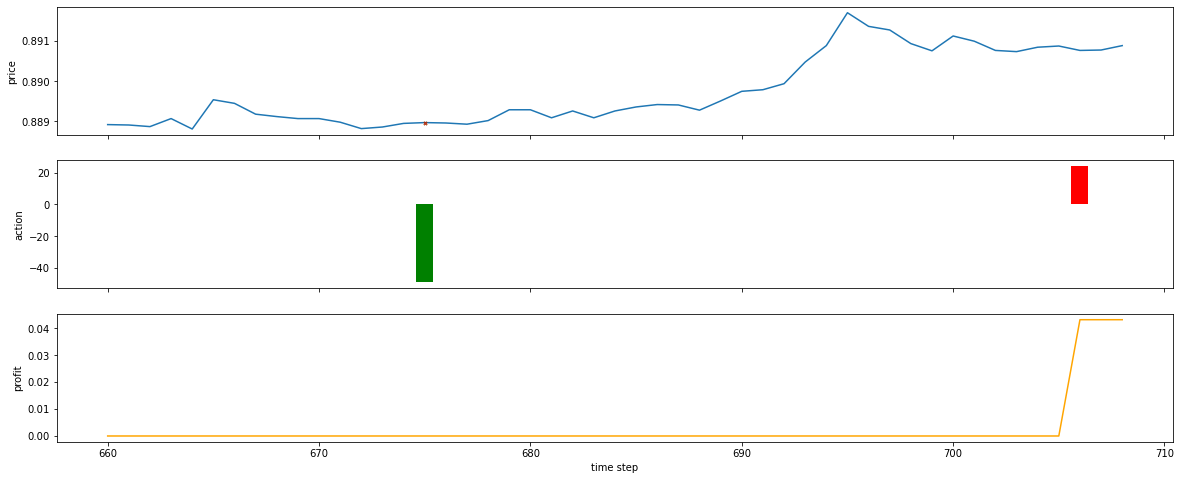

In [171]:
graph(df[df.episode==11])

In [157]:
fname = "saved_data/test.pickle"
with open(fname, 'rb') as handle:
    df1 = pickle.load(handle)

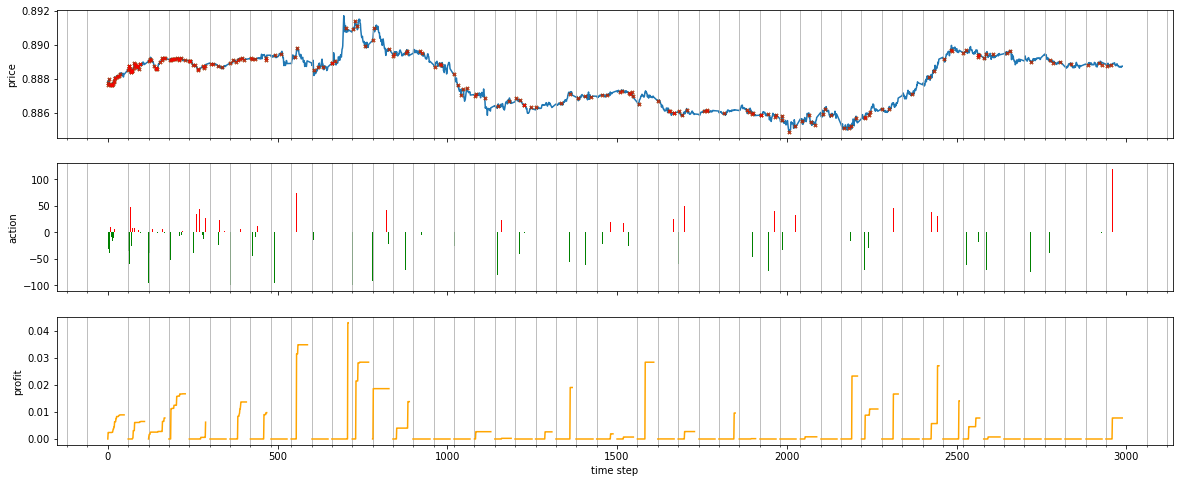

In [169]:
graph(df1)